### Importación de datos



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación






In [2]:
# Agregue una columna 'Tienda' a cada DataFrame
tienda['Tienda'] = 1
tienda2['Tienda'] = 2
tienda3['Tienda'] = 3
tienda4['Tienda'] = 4

# Concatenar todos los DataFrames en uno solo
tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

def ingreso_total_tiendas(df, nombre_tienda):
  # Filtrar las ventas por tienda
  ventas_tienda = df[df['Tienda'] == nombre_tienda]

  # Calcular la suma de las ventas para esa tienda
  ingreso_total = ventas_tienda['Precio'].sum()

  print(f"Ingresos totales de la tienda {nombre_tienda}:")
  print(ingreso_total)
  print("\n")

ingreso_total_tiendas(tiendas, 1)
ingreso_total_tiendas(tiendas, 2)
ingreso_total_tiendas(tiendas, 3)
ingreso_total_tiendas(tiendas, 4)

Ingresos totales de la tienda 1:
1150880400.0


Ingresos totales de la tienda 2:
1116343500.0


Ingresos totales de la tienda 3:
1098019600.0


Ingresos totales de la tienda 4:
1038375700.0




# 2. Ventas por categoría

In [3]:
# calcular la cantidad de productos vendidos por categoría en cada tienda.
#grupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

def productos_mas_vendidos(df, nombre_tienda):
  # Agrupa por categoría y cuenta las ventas
  ventas_por_categoria = df.groupby('Categoría del Producto')['Producto'].count()
  ventas_por_categoria = ventas_por_categoria.sort_values(ascending=False)

  print(f"Productos mas vendidos por categoría en {nombre_tienda}:")
  print(ventas_por_categoria)
  print("\n")

productos_mas_vendidos(tienda, "Tienda 1")
productos_mas_vendidos(tienda2, "Tienda 2")
productos_mas_vendidos(tienda3, "Tienda 3")
productos_mas_vendidos(tienda4, "Tienda 4")

Productos mas vendidos por categoría en Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: Producto, dtype: int64


Productos mas vendidos por categoría en Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: Producto, dtype: int64


Productos mas vendidos por categoría en Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instru

# 3. Calificación promedio de la tienda





In [4]:
# Agregue una columna 'Tienda' a cada DataFrame
tienda['Tienda'] = 1
tienda2['Tienda'] = 2
tienda3['Tienda'] = 3
tienda4['Tienda'] = 4

# Concatenar todos los DataFrames en uno solo
tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)


def calcular_calificacion_promedio_por_tienda(df):
    """Calcula la calificación promedio de los clientes para cada tienda.

    Args:
        DataFrame con los datos de las tiendas.

    Returns:
        Un DataFrame con la calificación promedio para cada tienda.
    """

    calificacion_promedio_por_tienda = df.groupby('Tienda')['Calificación'].mean()
    return calificacion_promedio_por_tienda

# Llamar a la función para obtener la calificación promedio por tienda
calificaciones_promedio = calcular_calificacion_promedio_por_tienda(tiendas)

# Imprimir el resultado
print("\nLa calificación promedio de los clientes por tienda es:\n", calificaciones_promedio.round(2))


La calificación promedio de los clientes por tienda es:
 Tienda
1    3.98
2    4.04
3    4.05
4    4.00
Name: Calificación, dtype: float64


# 4. Productos más y menos vendidos

In [5]:
# Productos más y menos vendidos de la tienda en una funcion

def productos_mas_menos_vendidos(df, nombre_tienda):
    # Agrupa por producto y cuenta las ventas
    ventas_por_producto = df.groupby('Producto')['Producto'].count()
    ventas_por_producto = ventas_por_producto.sort_values(ascending=False)

    # Obtiene el producto más vendido
    producto_mas_vendido = ventas_por_producto.index[0]
    cantidad_mas_vendida = ventas_por_producto.iloc[0]

    # Obtiene el producto menos vendido
    producto_menos_vendido = ventas_por_producto.index[-1]
    cantidad_menos_vendida = ventas_por_producto.iloc[-1]

    print(f"Productos más y menos vendidos en {nombre_tienda}:")
    print(f"Producto más vendido: {producto_mas_vendido} (Cantidad: {cantidad_mas_vendida})")
    print(f"Producto menos vendido: {producto_menos_vendido} (Cantidad: {cantidad_menos_vendida})")
    print("\n")

productos_mas_menos_vendidos(tienda, "Tienda 1")
productos_mas_menos_vendidos(tienda2, "Tienda 2")
productos_mas_menos_vendidos(tienda3, "Tienda 3")
productos_mas_menos_vendidos(tienda4, "Tienda 4")


Productos más y menos vendidos en Tienda 1:
Producto más vendido: Armario (Cantidad: 60)
Producto menos vendido: Auriculares con micrófono (Cantidad: 33)


Productos más y menos vendidos en Tienda 2:
Producto más vendido: Iniciando en programación (Cantidad: 65)
Producto menos vendido: Juego de mesa (Cantidad: 32)


Productos más y menos vendidos en Tienda 3:
Producto más vendido: Kit de bancas (Cantidad: 57)
Producto menos vendido: Bloques de construcción (Cantidad: 35)


Productos más y menos vendidos en Tienda 4:
Producto más vendido: Cama box (Cantidad: 62)
Producto menos vendido: Guitarra eléctrica (Cantidad: 33)




# 5. Envío promedio por tienda

In [6]:
# Concatenar todos los DataFrames en uno solo
tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

def envio_promedio_por_tienda(df, nombre_tienda):
  # Filtrar los envios por tienda
  envios_tienda = df[df['Tienda'] == nombre_tienda]

  # Calcular el promedio de los envios para esa tienda
  envios_total = envios_tienda['Costo de envío'].mean()

  print(f"Envios promedio de la tienda {nombre_tienda}:")
  print(envios_total)
  print("\n")

envio_promedio_por_tienda(tiendas, 1)
envio_promedio_por_tienda(tiendas, 2)
envio_promedio_por_tienda(tiendas, 3)
envio_promedio_por_tienda(tiendas, 4)

Envios promedio de la tienda 1:
26018.60958033065


Envios promedio de la tienda 2:
25216.235693090293


Envios promedio de la tienda 3:
24805.680373039424


Envios promedio de la tienda 4:
23459.457167090754




# 6. Graficos pora cada tienda

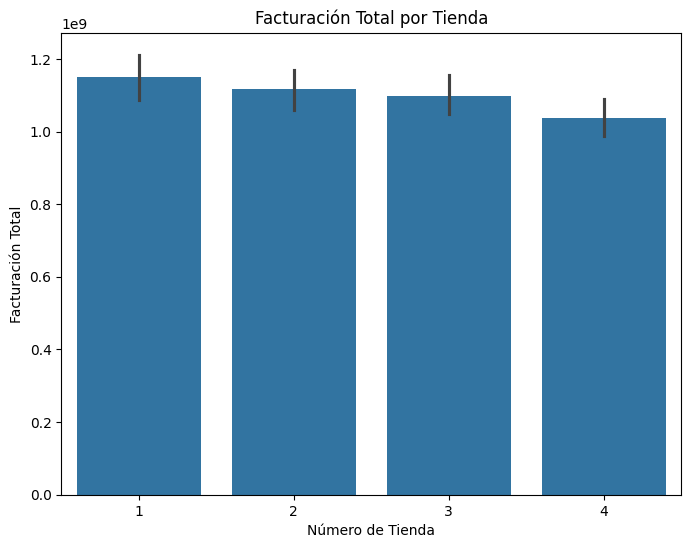

In [7]:
# 1. Facturación por tienda
plt.figure(figsize=(8, 6))
sns.barplot(x='Tienda', y='Precio', data=tiendas, estimator=sum)
plt.title('Facturación Total por Tienda')
plt.xlabel('Número de Tienda')
plt.ylabel('Facturación Total')
plt.show()

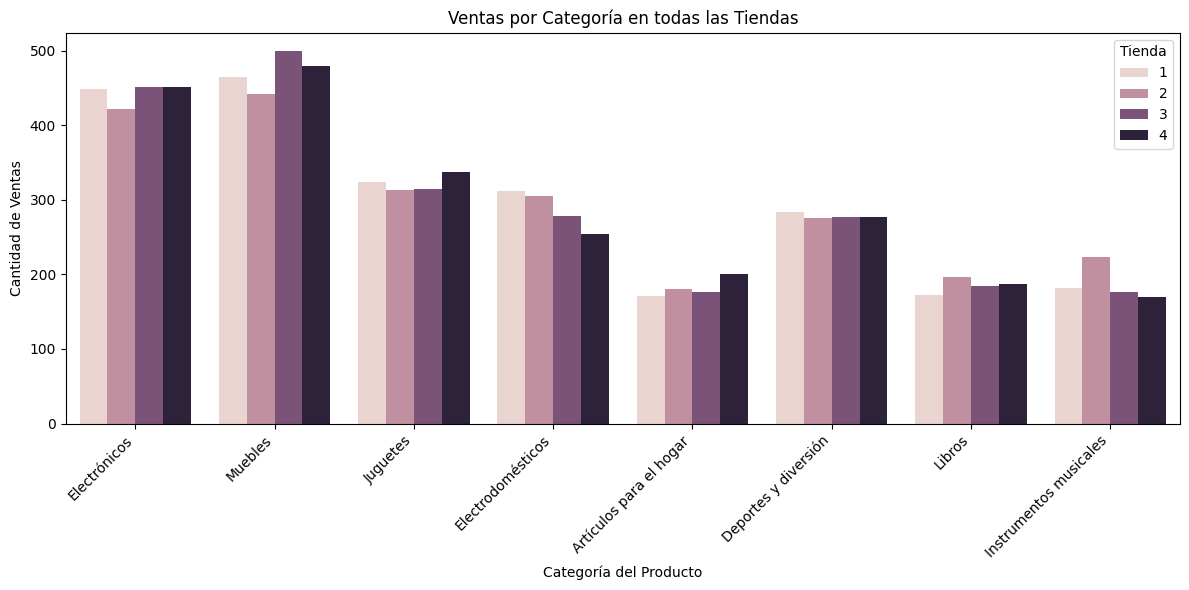

In [8]:
# 2. Ventas por categoría en todas las tiendas
plt.figure(figsize=(12, 6))
sns.countplot(x='Categoría del Producto', hue='Tienda', data=tiendas)
plt.title('Ventas por Categoría en todas las Tiendas')
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x
plt.tight_layout() # Ajustar el diseño para evitar superposición
plt.show()

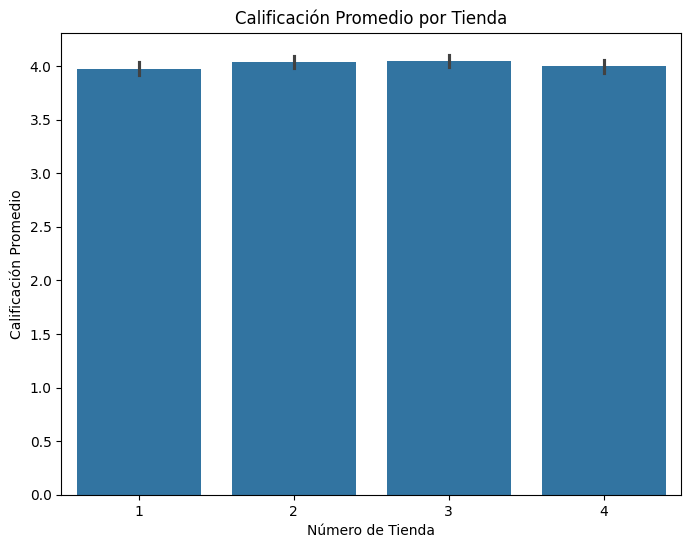

In [9]:
# 3. Calificación promedio por tienda
plt.figure(figsize=(8, 6))
sns.barplot(x='Tienda', y='Calificación', data=tiendas, estimator=np.mean)
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Número de Tienda')
plt.ylabel('Calificación Promedio')
plt.show()


In [16]:
# Tabla de resumen de todas las tiendas

import pandas as pd
# Crear un diccionario para almacenar los datos de resumen de cada tienda
resumen_tiendas = {}

# Calcular las métricas para cada tienda
for tienda_num in range(1, 5):
    tienda_data = tiendas[tiendas['Tienda'] == tienda_num]

    ingresos_totales = tienda_data['Precio'].sum()
    calificacion_promedio = tienda_data['Calificación'].mean()
    costo_envio_promedio = tienda_data['Costo de envío'].mean()

    # Obtener el producto más y menos vendido
    ventas_por_producto = tienda_data.groupby('Producto')['Producto'].count()
    producto_mas_vendido = ventas_por_producto.idxmax()
    producto_menos_vendido = ventas_por_producto.idxmin()

    resumen_tiendas[tienda_num] = {
        'Ingresos Totales': ingresos_totales,
        'Calificación Promedio': calificacion_promedio,
        'Costo de envío promedio': costo_envio_promedio,
        'Producto más vendido': producto_mas_vendido,
        'Producto menos vendido': producto_menos_vendido
    }

# Crear un DataFrame a partir del diccionario
tabla_resumen = pd.DataFrame.from_dict(resumen_tiendas, orient='index')

# Mostrar la tabla de resumen
tabla_resumen

,Ingresos Totales,Calificación Promedio,Costo de envío promedio,Producto más vendido,Producto menos vendido
1,1.150880e+09,3.976685,26018.609580,Armario,Auriculares con micrófono
2,1.116344e+09,4.037304,25216.235693,Iniciando en programación,Juego de mesa
3,1.098020e+09,4.048326,24805.680373,Kit de bancas,Bloques de construcción
4,1.038376e+09,3.995759,23459.457167,Cama box,Guitarra eléctrica


In [17]:
# Basado en la salida del código actual, se puede generar una recomendación final

# Encontrar la tienda con menor ingreso total
tienda_menor_ingreso = tabla_resumen['Ingresos Totales'].idxmin()

# Encontrar la tienda con menor calificación promedio
tienda_menor_calificacion = tabla_resumen['Calificación Promedio'].idxmin()

# Generar la recomendación
print(f"En base al análisis realizado, se recomienda prestar atención a la tienda {tienda_menor_ingreso} debido a su bajo rendimiento en términos de facturación. \
      Adicionalmente, la tienda {tienda_menor_calificacion} presenta la calificación promedio más baja.")


En base al análisis realizado, se recomienda prestar atención a la tienda 4 debido a su bajo rendimiento en términos de facturación.       Adicionalmente, la tienda 1 presenta la calificación promedio más baja.



# Basado en el análisis realizado la tienda 4 es la mas razonable para su venta, y las posibles razones son:

1. Baja facturación:  Se debe comparar la facturación total de la tienda 4 con las demás tiendas. Si es significativamente menor,
esto indica un bajo rendimiento en ventas y una posible falta de rentabilidad.  La variable `tienda_menor_ingreso`  identifica la tienda con los menores ingresos.

2. Baja calificación promedio de los clientes: Una baja calificación promedio puede reflejar una mala experiencia del cliente,
problemas con el servicio, productos de mala calidad, o una ubicación inconveniente.  La variable `tienda_menor_calificacion`  identifica la tienda con la menor calificación.

3. Costo de envío promedio:  Aunque no es determinante por sí sola, un costo de envío significativamente mayor que en las demás tiendas podría
indicar problemas logísticos o de ubicación que afectan la rentabilidad.  Se debe comparar con las demás tiendas.

4. Productos menos vendidos:  Si la tienda 4 vende una cantidad considerable de productos con bajo volumen de ventas, esto puede ser señal de una
mala gestión de inventario o una falta de productos atractivos para los clientes. Se debe analizar la cantidad de productos menos vendidos en comparación a otras tiendas.

5. Análisis de las demás métricas:  Es importante comparar todos los indicadores clave de rendimiento (KPI) de la tienda 4 con las otras tiendas,
incluyendo las ventas por categoría, los productos más y menos vendidos y los costos de envío.

Para una recomendación más precisa, se necesita un análisis más profundo que incluya:

* Comparación directa de las métricas de la tienda 4 contra las demás tiendas.
* Análisis de la estacionalidad de las ventas.
* Consideración de costos operativos y margen de ganancia.

La tabla resumen y las variables `tienda_menor_ingreso` y `tienda_menor_calificacion`  brindan información inicial para la toma de decisiones, pero se debe realizar un análisis más exhaustivo.
